## 라이브러리 호출

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib import rc
rc('font', family='NanumGothic') 
plt.rcParams['axes.unicode_minus'] = False 
from matplotlib import font_manager
# 폰트 경로 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'  
font_prop = font_manager.FontProperties(fname=font_path)
import json
from konlpy.tag import Okt
from collections import Counter
import itertools


In [4]:
# json 불러오기
file_path = "../chunker/avante_Owner's_Manual_pdfminer_chunks.json"
data = []

with open(file_path, "r", encoding="utf-8") as f:
    for line in f:
        data.append(json.loads(line))

avante = pd.DataFrame(data)

# 결과 확인
print(avante.head())


                                                text      type source_pages  \
0  안전 및 차량 손상 경고\n본 취급설명서는 고객 및 차량의 안전과 관련한 심각한 위...                    [1]   
1                                     선택 또는 미장착 사양표시  subtitle          [1]   
2                                                  <  subtitle          [1]   
3  >\n본 취급설명서에는 모든 트림모델 및 선택사양을 포함\n하여 설명하고 있습니다....  subtitle          [1]   
4                                        내용 찾기 방법 설명     title          [2]   

  model  
0   아반떼  
1   아반떼  
2   아반떼  
3   아반떼  
4   아반떼  


In [4]:
# 전체 행/열 수와 결측치 등 기본 정보
avante.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   text          47 non-null     object
 1   type          47 non-null     object
 2   source_pages  47 non-null     object
 3   model         47 non-null     object
dtypes: object(4)
memory usage: 1.6+ KB


In [5]:
print(avante['type'].value_counts())
print("-"*50)
print(avante['source_pages'].value_counts())
print("-"*50)
print(avante['model'].value_counts())
print("-"*50)


type
title       30
subtitle    16
             1
Name: count, dtype: int64
--------------------------------------------------
source_pages
[5]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          11
[1]                                                                                                                                                                                                                                                                                                                                                         

## 빈도기반 분석

형태소 분석기를 이용해, 청크(text) 데이터를 단어 단위로 쪼갬.
'은,는,이,가'등 의미없는 불용어를 제거하고 전체 text에서 가장 많이 등장한 
상위 단어 50개 출력

In [6]:
from konlpy.tag import Okt
from collections import Counter
import itertools

# 1. Okt 형태소 분석기 초기화
okt = Okt()

# 2. 텍스트 데이터
avante_texts = avante['text'].tolist()

# 3. 각 문장을 형태소 분석하여 단어 단위로 나누기
avante_tokenized = [okt.nouns(text) for text in avante_texts]  # 명사 추출

# 불용어 처리 
stopwords = ['수', '를', '고', '이', '경', '주', '중', '시오', '의', '후', '시', '수', 
             '등', '때', '및', '경우','로']

# 4. 불용어 제거
avante_filtered_tokens = [
    [word for word in sentence if word not in stopwords] for sentence in avante_tokenized
]

# 5. 단어 빈도 집계 (불용어 제거 후 단어 리스트 사용)
avante_flat_tokens = list(itertools.chain.from_iterable(avante_filtered_tokens))  # 리스트 평탄화
avante_word_freq = Counter(avante_flat_tokens)


# 6. 상위 50개 단어 출력
avante_top_n = 50
avante_top_words = avante_word_freq.most_common(avante_top_n)

# 출력
for word, freq in avante_top_words:
    print(f'{word}: {freq}')



차량: 1257
작동: 1052
상태: 844
주행: 814
시동: 729
설정: 673
보조: 651
표시: 608
사용: 593
버튼: 531
브레이크: 526
기능: 524
키: 485
도어: 467
엔진: 464
경고: 460
주차: 436
타이어: 422
점검: 418
속도: 412
해제: 410
운전: 400
충돌: 393
좌석: 389
위치: 376
자동: 373
시스템: 366
차: 365
장치: 360
스마트: 352
전방: 351
주의: 326
방지: 325
안전: 306
변속: 305
고등: 304
조절: 303
에어백: 300
이상: 297
페달: 293
클러스터: 291
운전자: 283
석: 282
확인: 276
스위치: 254
선택: 241
센서: 232
후방: 230
휠: 227
모드: 225


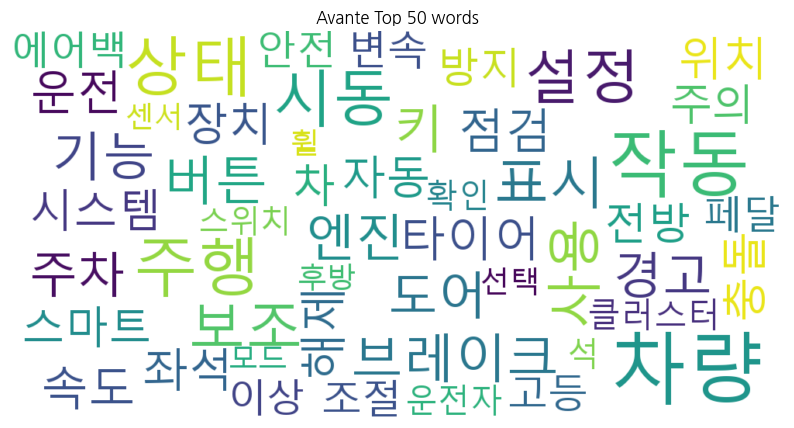

In [7]:
from wordcloud import WordCloud
# 1. top_words를 dict 형태로 변환
avante_top_words_dict = dict(avante_top_words)

# 2. 워드 클라우드 시각화
avante_wordcloud = WordCloud(width=1000, height=500, background_color='white',
                      font_path='C:/Windows/Fonts/malgun.ttf', 
                      max_font_size=100,  # 글자 크기 제한
                      min_font_size=20,   # 최소 글자 크기
                      prefer_horizontal=0.9).generate_from_frequencies(avante_top_words_dict)

# 3. 시각화 출력
plt.figure(figsize=(10, 6))
plt.imshow(avante_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Avante Top 50 words")
plt.show()

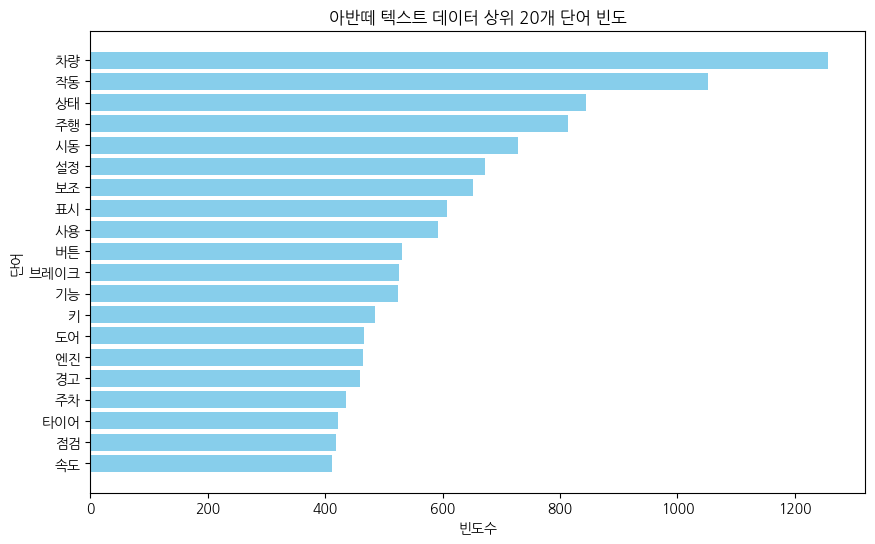

In [8]:
avante_top_words2 = avante_word_freq.most_common(20)
avante_top_words_dict2 = dict(avante_top_words2)
avante_words, avante_counts = zip(*avante_top_words2)# 단어와 빈도를 분리

plt.figure(figsize=(10, 6))
plt.barh(avante_words, avante_counts, color='skyblue')
plt.xlabel('빈도수')
plt.ylabel('단어')
plt.title('아반떼 텍스트 데이터 상위 20개 단어 빈도')
plt.gca().invert_yaxis()  # 상위 단어가 위에 오도록 설정
plt.show()

## TF-IDF 기반 분석
TF-IDF는 문서에서 특정 단어가 자주 등장하지만 전체 문서에서는 드물게 등장할수록 더 중요한 단어로 간주하는 가중치 계산 방법
=>  청크 안에서는 자주 나오지만, 전체 차종 설명서에서는 흔하지 않은 단어로,
 그 청크만의 특성이나 주제를 잘 나타내는 단어

차량: 3.8430
표시: 2.6552
점검: 2.4567
주행: 2.2724
방법: 2.0099
장치: 1.9870
시동: 1.9440
작동: 1.9395
엔진: 1.9157
내용: 1.9147
사용: 1.8202
타이어: 1.7996
브레이크: 1.7735
상태: 1.7559
결함: 1.6507
기능: 1.5970
보조: 1.5057
안전: 1.4305
고등: 1.4219
주의: 1.4095
제작: 1.3774
명칭: 1.3457
설명: 1.3242
사고: 1.2804
색인: 1.2750
자동: 1.2579
운전: 1.2290
안내: 1.2247
설정: 1.1479
경고: 1.1406
연료: 1.1257
주차: 1.1175
버튼: 1.1129
시스템: 1.0565
선택: 1.0365
조절: 1.0348
이상: 1.0345
자동차: 1.0221
사양: 1.0185
좌석: 1.0184
사항: 1.0067
정보: 0.9973
램프: 0.9789
교체: 0.9659
기록: 0.9658
에어백: 0.9283
금지: 0.8686
도어: 0.8487
모드: 0.8466
충돌: 0.8462


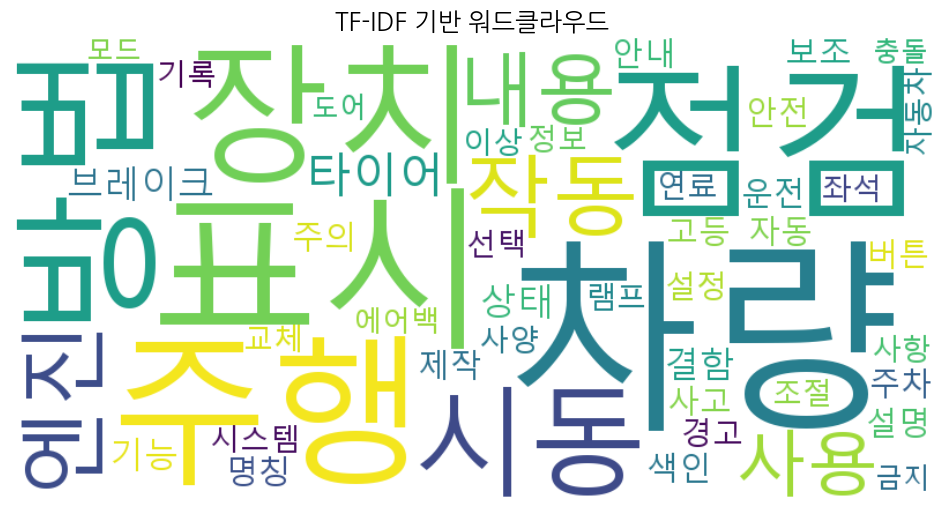

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

# 문서별로 띄어쓰기 기준으로 연결
avante_docs = [' '.join(tokens) for tokens in avante_filtered_tokens]

# 2. TF-IDF 벡터화
avante_vectorizer = TfidfVectorizer()
avante_X = avante_vectorizer.fit_transform(avante_docs)

# 3. 단어와 점수 추출
avante_words = avante_vectorizer.get_feature_names_out()
avante_scores = avante_X.sum(axis=0).A1  # 각 단어의 TF-IDF 점수 합계
avante_word_scores = dict(zip(avante_words, avante_scores))

avante_top_50 = sorted(avante_word_scores.items(), key=lambda x: x[1], reverse=True)[:50]
for avante_word, avante_score in avante_top_50:
    print(f"{avante_word}: {avante_score:.4f}")
# 4. 워드클라우드 시각화
# top_50이 리스트 형태일 때 → dict로 변환
avante_top_50_dict = dict(avante_top_50)

# 워드클라우드 생성
avante_wordcloud = WordCloud(
    font_path='malgun.ttf',
    width=800, height=400,
    background_color='white'
).generate_from_frequencies(avante_top_50_dict)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(avante_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("TF-IDF 기반 워드클라우드", fontsize=18)
plt.show()


## 네트워크 그래프
* 노드(점)와 엣지(선)로 이루어진 구조로, 객체들 간의 관계나 연결을 시각화하는 방법
=>네트워크 그래프를 통해 관계망에서 어떤 노드가 중요한지, 노드들 간의 연결 패턴이 어떤지를 쉽게 파악

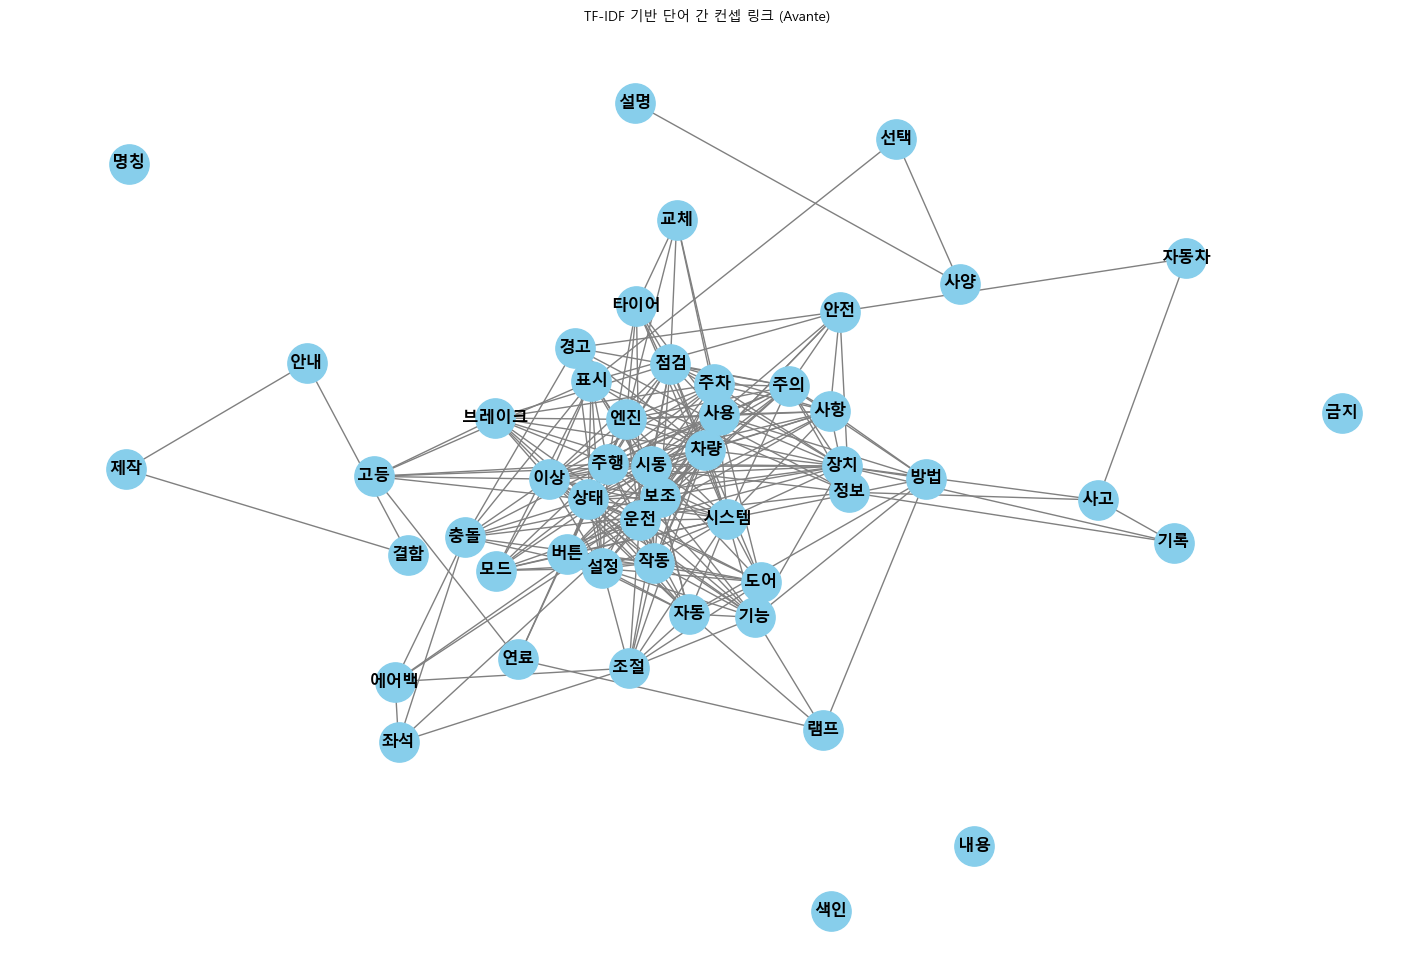

In [12]:
import matplotlib.pyplot as plt
import networkx as nx
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# 1. avante_top_50 단어 리스트와 인덱스 추출
avante_top_words = [word for word, score in avante_top_50]
avante_top_indices = [avante_vectorizer.vocabulary_[word] for word in avante_top_words]

# 2. 각 단어의 TF-IDF 벡터 추출 (문서 수 만큼 있는 벡터를 단어별로 전치)
avante_word_vectors = avante_X[:, avante_top_indices].T.toarray()  # shape: (50, num_docs)

# 3. 단어 간 코사인 유사도 계산
avante_similarity_matrix = cosine_similarity(avante_word_vectors)

# 4. 네트워크 그래프 생성
avante_G = nx.Graph()

# 노드 추가
for word in avante_top_words:
    avante_G.add_node(word)

# 엣지 추가 (유사도 임계값 이상일 때만)
avante_threshold = 0.4  # 유사도 기준 (필요에 따라 조절 가능)
for i in range(len(avante_top_words)):
    for j in range(i + 1, len(avante_top_words)):
        sim = avante_similarity_matrix[i][j]
        if sim >= avante_threshold:
            avante_G.add_edge(avante_top_words[i], avante_top_words[j], weight=sim)
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 말굽 폰트 설정
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_prop = fm.FontProperties(fname=font_path)

# 시각화
plt.figure(figsize=(18, 12))
avante_pos = nx.spring_layout(avante_G, k=0.5, seed=42)
nx.draw_networkx_nodes(avante_G, avante_pos, node_color='skyblue', node_size=800)

# ✅ 한글 폰트 설정: font_family에 폰트 이름 넣기
nx.draw_networkx_labels(
    avante_G, avante_pos,
    font_size=12,
    font_weight='bold',
    font_family=font_prop.get_name()
)

nx.draw_networkx_edges(avante_G, avante_pos, edge_color='gray')

# 제목에도 폰트 적용하고 싶다면:
plt.title("TF-IDF 기반 단어 간 컨셉 링크 (Avante)", fontsize=50, fontproperties=font_prop)
plt.axis('off')
plt.show()


## 청크 오류 확인

In [13]:
# 조사로 끝나는 text 청크 확인
import re

def is_cut_off(text):
    return bool(re.search(r'(는|가|을|를|에|으로|에게|와|과)$', text.strip()))

avante['cut_off'] = avante['text'].apply(is_cut_off)
avante_cut = avante[avante['cut_off']]
print(avante_cut[['text']])

Empty DataFrame
Columns: [text]
Index: []


조사로 끝나는 청크, 즉 문장이 제대로 끝나지 않는 청크 단위가 존재하는지 파악.

In [14]:
# 특수기호로 시작하는 청크 확인
# '-', '*', ',', '.' 로 시작하는 텍스트 필터링
special_start = avante[avante['text'].str.match(r'^[-\*,\.]')]

# 결과 확인
print(special_start[['text']])


                                                 text
39  -\n작동될 때\nOTD059012\nOTD059012\n•  엔진에 시동을 걸면 ...


각 문장의 시작이 특수 기호 즉, 불필요한 기호로 시작하는지 파악

## GPT2
 KoGPT 모델을 사용하여 텍스트(청크 단위)의 perplexity 값을 계산하고, 이를 기준으로 문제가 있을 수 있는 문장을 찾아내는 과정
 * Perplexity는 모델이 문장을 예측하는 데 어려움을 겪는 정도
 * 목차를 저장한, 짧은 청크의 경우, Perplexity값이 높게 나와, 100자 이상인 텍스트만 검사 실시
 * Perplexity값이 100이상이면 모델이 이해하기 힘든 문장이라고 판단.

In [15]:
from transformers import GPT2LMHeadModel, PreTrainedTokenizerFast
import torch
import numpy as np
import pandas as pd
from tqdm import tqdm

# tqdm 적용
tqdm.pandas()

# 1. KoGPT 불러오기
tokenizer = PreTrainedTokenizerFast.from_pretrained("skt/kogpt2-base-v2")
model = GPT2LMHeadModel.from_pretrained("skt/kogpt2-base-v2")
model.eval()

# 2. Perplexity 계산 함수
def get_perplexity(text):
    try:
        if len(text) < 100:  # 100자 미만은 계산 안 함
            return np.nan
        encodings = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
        input_ids = encodings.input_ids
        with torch.no_grad():
            outputs = model(input_ids, labels=input_ids)
            loss = outputs.loss
        return np.exp(loss.item())
    except:
        return np.nan

# 3. 전체 텍스트에 대해 perplexity 계산 (100자 이상만)
avante['perplexity'] = avante['text'].progress_apply(get_perplexity)

# 4. Perplexity 기준 상위 10개 출력 (문제가 의심되는 문장)
problematic_texts = avante.sort_values(by='perplexity', ascending=False).head(10)
print(problematic_texts[['text', 'perplexity']])


c:\Users\jeongbin\Projects\hyundai_reg_bot\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'GPT2Tokenizer'. 
The class this function is called from is 'PreTrainedTokenizerFast'.
100%|██████████| 47/47 [00:56<00:00,  1.19s/it]

                                                 text  perplexity
7   명칭으로 찾을 때\n점검방법이\n어느 장에 있지\n목차를 활용하세요.\n이 스위치가...  151.919636
0   안전 및 차량 손상 경고\n본 취급설명서는 고객 및 차량의 안전과 관련한 심각한 위...  100.822000
13  (제30조의3제1항 관련)\n이 자동차에는 사고기록장치가 장착되어 있습니다.\n사고...   90.705063
44  배출가스 제어장치의 관리 및 정비\n배출가스 제어 관련 부품중에서 특히 다음의 항목...   76.848795
43  9\n엔진부의 명칭\n̰ Smartstream G 1.6\n̰ 1.6 LPI\nOC...   60.334873
41  8\n주행 중 경고\n̰ 비상 경고등\n주행 중 차량 고장 시 대처 방법\n̰ 교차...   57.573311
31  EPB\n전자식 파킹 브레이크에 이상이 있으면 경고등이 켜집 니다. 가까운 당사 직...   56.247699
28  주정차 중 휴대 전화 사용\n• 가연성 물질을 싣지 마십시오.\n• 여름철과 같이 ...   53.493372
14  목차\n안내 및 차량 정보 I 차량의 외관, 내관, 엔진룸, 차량 정보\n안전 및 ...   48.532914
40  7\ni  알아두기\n인포테인먼트 소프트웨어 버전에 따라 운전자 보조 시스템의 각 ...   45.686631


100점 이상일 경우 부자연스러운 문장으로 간주

In [5]:
print(avante.loc[7, 'text'])


명칭으로 찾을 때
점검방법이
어느 장에 있지
목차를 활용하세요.
이 스위치가
뭐지?
그림 목차 (내관도 I ) 를 활용하세요.
에어컨
사용방법이
어디지...
색인(명칭) 목차 활용하세요.


## 이건 좀 이상해 보이긴 하네,,,

In [6]:
print(avante.loc[0, 'text'])

안전 및 차량 손상 경고
본 취급설명서는 고객 및 차량의 안전과 관련한 심각한 위험과 제품 사용에 대한 올바른 정보를 사전에 알 리는 안전경고 표시입니다. 지시사항은 반드시 숙지하여 지켜주십시오.
경고, 주의표시
경고, 주의가 있는 문장 및 진하게 표시되어 있는 부분은 특히 유념하십시오.
주 의
차량이 고장나거나 손상될 우려가 있는 경우의 주의 표 시입니다.
경 고
사람이 다치거나 사망의 우려가 있는 경우의 경고 표시 입니다.
i  알아두기
차량 용어 또는 추가 설명이 필요한 정보 표시입니다.
안전을 위해 반드시 지켜야 하는 금지 표시입니다.


이건 괜찮은 듯?

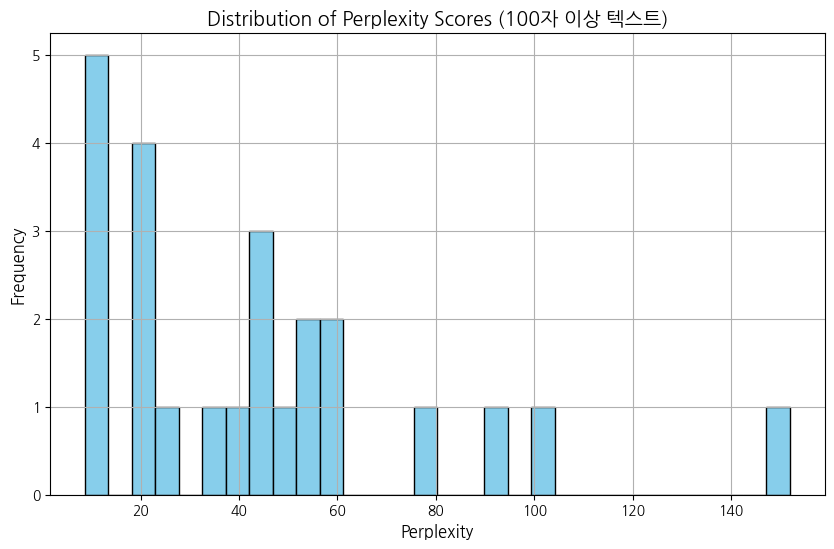

In [16]:
import matplotlib.pyplot as plt

# NaN 제거
valid_perplexities = avante['perplexity'].dropna()

# 히스토그램 그리기
plt.figure(figsize=(10, 6))
plt.hist(valid_perplexities, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Perplexity Scores (100자 이상 텍스트)', fontsize=14)
plt.xlabel('Perplexity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()


y축이 빈도, x축은 혼란도(어려움)
2개의 청크를 제외한 45개의 청크들은 혼란도가 100이하로 대부분, 문장이 간결하고 이해하기 쉽다고 판단할 수 있음.